# Shapley Approximation (shap)

https://github.com/shap/shap

In [34]:
#Training and Testing Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
import shap
import xgboost as xgb

In [36]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "tree_method": "gpu_hist",
}

In [37]:
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [38]:
# Explain predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Visualizations - Shapley Approximation (shap)

In [39]:
# Calculate feature importance
ft_importance = pd.DataFrame({"Feature Importance": np.abs(shap_values).mean(0)}, index=X_train.columns)
X_cols = ft_importance.query('`Feature Importance` > 0').sort_values(by="Feature Importance", ascending=False)

# Display
X_cols.style.background_gradient(cmap='viridis', vmin=.001, vmax=.6).format({"Feature Importance": "{:.3f}"})


,Feature Importance
EEG 17,1.296
EEG 1,0.339
EEG 2,0.279
EEG 10,0.221
EEG 18,0.198
EEG 28,0.195
EEG 7,0.189
EEG 30,0.184
EEG 6,0.166
EEG 5,0.141


### SHAP Summary Plot

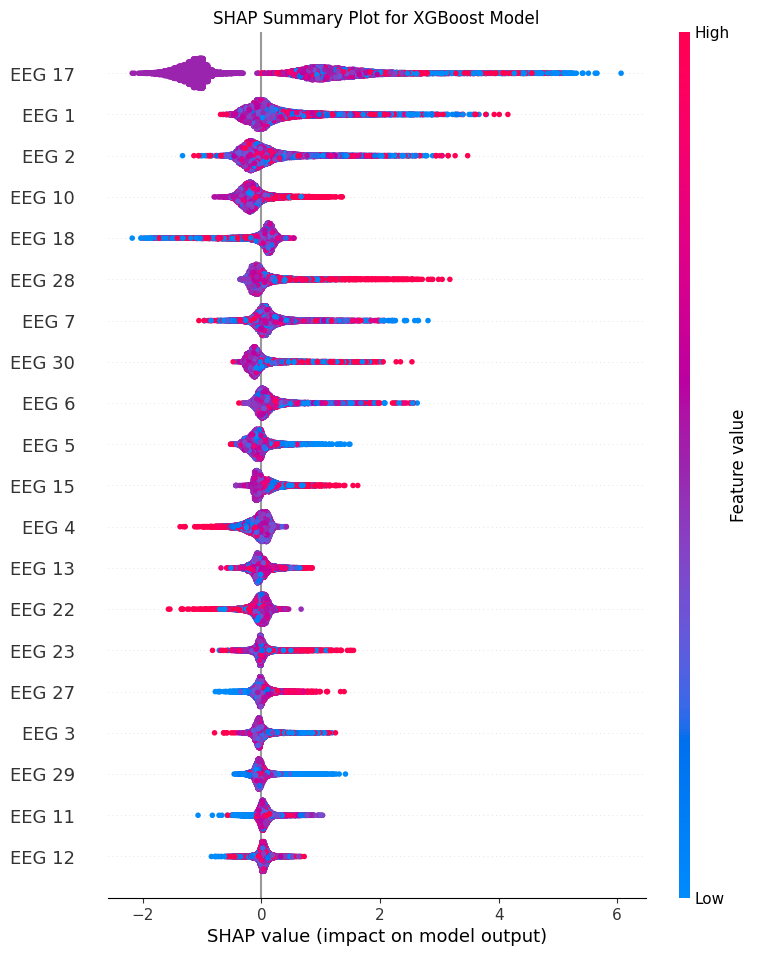

In [40]:
# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot for XGBoost Model")
plt.show()

### SHAP Bar plot

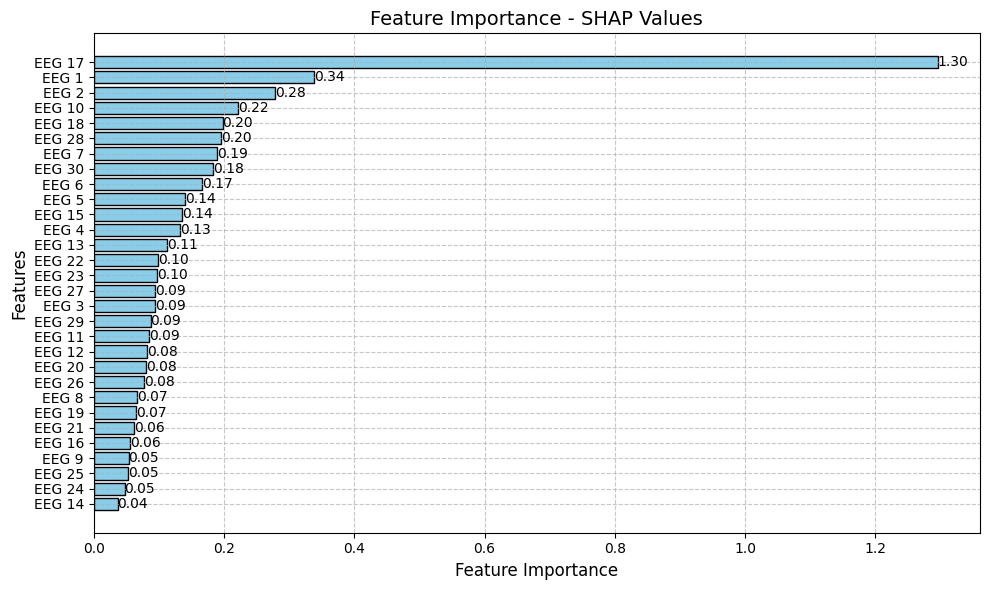

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))


bars = ax.barh(X_cols.index, X_cols['Feature Importance'], color='skyblue', edgecolor='black')
ax.grid(axis='both', linestyle='--', alpha=0.7)
ax.set_xlabel('Feature Importance', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title('Feature Importance - SHAP Values', fontsize=14)
ax.invert_yaxis()


for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
            '{:.2f}'.format(bar.get_width()), 
            va='center', ha='left', fontsize=10)


plt.tight_layout()
plt.show()

### SHAP Scatter plot

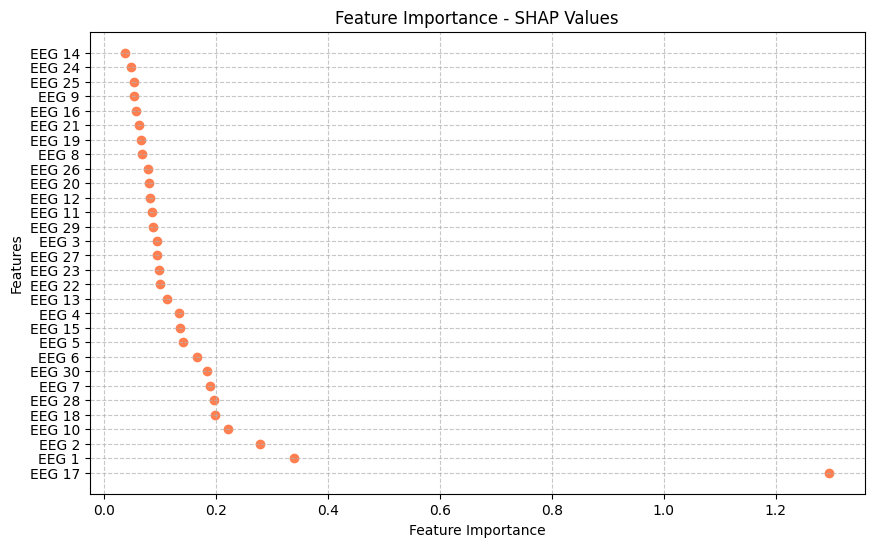

In [42]:
# Scatter plot of feature importance
plt.figure(figsize=(10, 6))
plt.scatter(X_cols['Feature Importance'], X_cols.index, color='coral')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - SHAP Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### SHAP Pie Chart

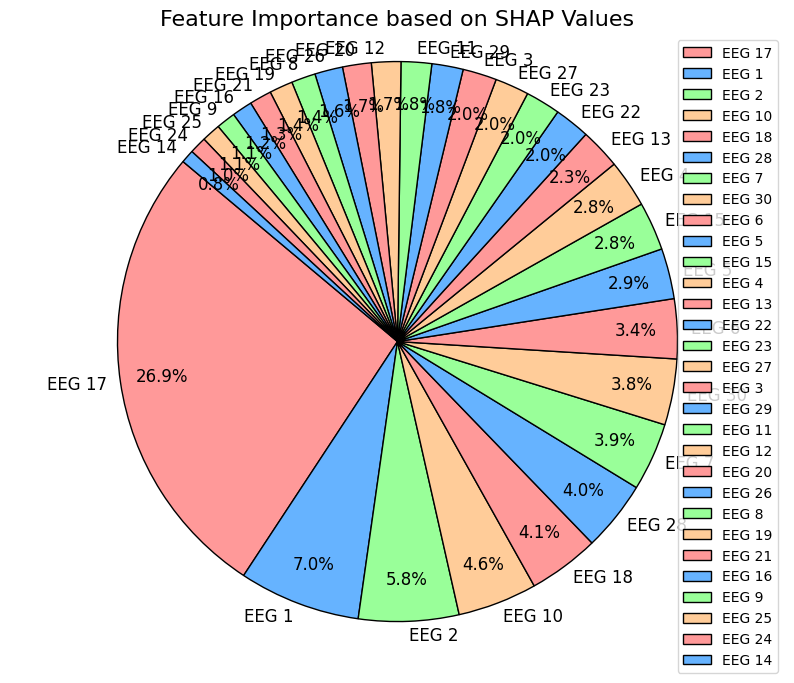

In [43]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(10, 8))


plt.pie(X_cols['Feature Importance'], 
        labels=X_cols.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors,      
        wedgeprops={'edgecolor': 'black'},  
        textprops={'fontsize': 12},  
        pctdistance=0.85,     
        labeldistance=1.05)   


plt.legend(X_cols.index, loc="best")
plt.title('Feature Importance based on SHAP Values', fontsize=16)
plt.axis('equal')
plt.show()